# About the Data Provided

The collection includes information on 1300 people's insurance charges. The information includes a person's basic details, such as age, sex, BMI, and place of residence.

            age: The person's age; sex: The person's gender; bmi: The person's body mass index; bp: The person's systolic blood pressure in millimetres per heartbeat; children: The person's total number of children;if the person smokes or not; the person's residential region; charges: The sum of a person's insurance company-billed medical expenses.
            
            To download the data set, please visit: https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

# Importing the necessary libraries

In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Checking the first five observations after loading the health insurance dataset.

In [51]:
# Printing the dataset and looking at the details
df= pd.read_csv('medical_cost_insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
# examining the DataSet shape
df.shape

(1338, 6)

In [42]:
#examining the datatypes of each and every column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   charges   1338 non-null   float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 57.6 KB


In [43]:
#examining a null value 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [44]:
#examining the description of the entire dataset
df.describe().round(2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.50,30.66,1.09,0.2,13270.42
std,14.05,0.01,6.10,1.21,0.4,12110.01
min,18.00,0.49,15.96,0.00,0.0,1121.87
25%,27.00,0.49,26.30,0.00,0.0,4740.29
50%,39.00,0.51,30.40,1.00,0.0,9382.03
75%,51.00,0.51,34.69,2.00,0.0,16639.91
max,64.00,0.51,53.13,5.00,1.0,63770.43


In [45]:
# checking the percentage of male and female in the dataset
df["sex"].value_counts(normalize=True)

0.505232    0.505232
0.494768    0.494768
Name: sex, dtype: float64

In [46]:
# Examining the percentage of smokers in the given dataset
df["smoker"].value_counts(normalize=True)

0    0.795217
1    0.204783
Name: smoker, dtype: float64

In [49]:
# checking the percentage of the region
df["region"].value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

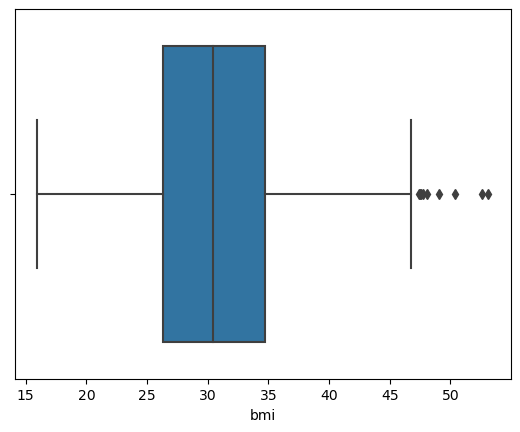

In [16]:
#Univariate Analysis
sns.boxplot(df.bmi)
plt.show()
#The column bmi has extreme values.

0.05567251565299186


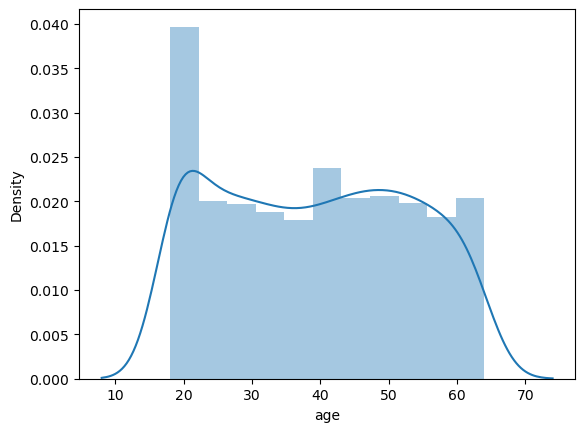

In [14]:
sns.distplot(df.age)
print(df.age.skew())
#Age column data has two peaks and is skewed slightly.

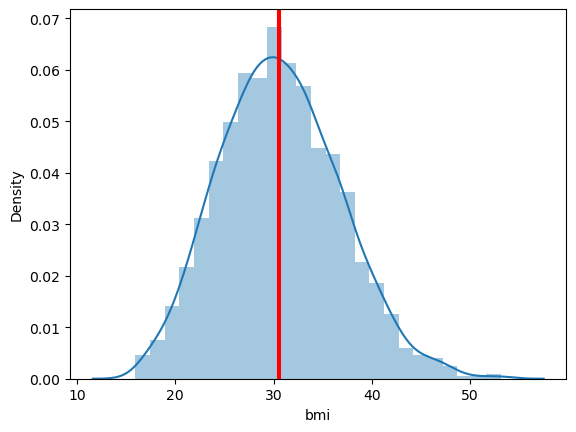

In [15]:
sns.distplot(df.bmi)
plt.axvline(df.bmi.mean(),color='r')
plt.axvline(df.bmi.median(),color='r')
plt.show()
#Since the mean and median are nearly equal, we may claim that the BMI is regularly distributed.

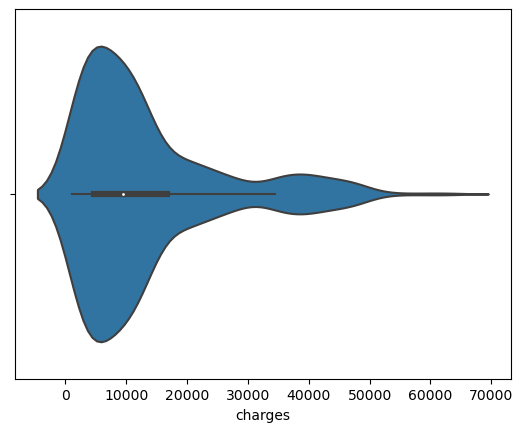

In [18]:
#Using a violin plot to visualise the distribution of medical costs and discuss how they are distributed.
sns.violinplot(df.charges)
plt.show()

In [19]:
#Multivariate Analysis
df[(df.age<30)&(df.charges>40000)]
#People under 30 years old whose annual medical expenses exceed $40,000

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.40,1,yes,southwest,51194.55914
292,25,male,45.54,2,yes,southeast,42112.23560
739,29,male,35.50,2,yes,southwest,44585.45587
1047,22,male,52.58,1,yes,southeast,44501.39820
1124,23,female,42.75,1,yes,northeast,40904.19950


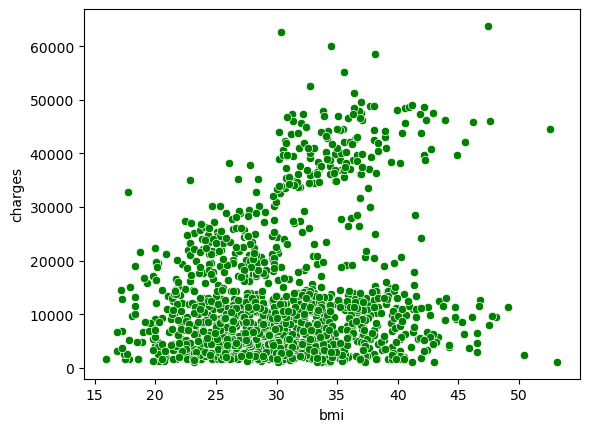

In [21]:
sns.scatterplot(df.bmi,df.charges,color='green')
plt.show()
#We can infer that values more than 50,000 are the outliers in the data.

In [23]:
df.groupby(['sex'])['bmi'].sum()
#% difference between males and females' BMIs

sex
female    20110.070
male      20917.555
Name: bmi, dtype: float64

In [24]:
df.groupby(('region'),['sex']=='male').max()
#area has the most males overall

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,64,male,48.07,5,yes,58571.07448
northwest,64,male,42.94,5,yes,60021.39897
southeast,64,male,53.13,5,yes,63770.42801
southwest,64,male,47.60,5,yes,52590.82939


# Visualization od Dataset

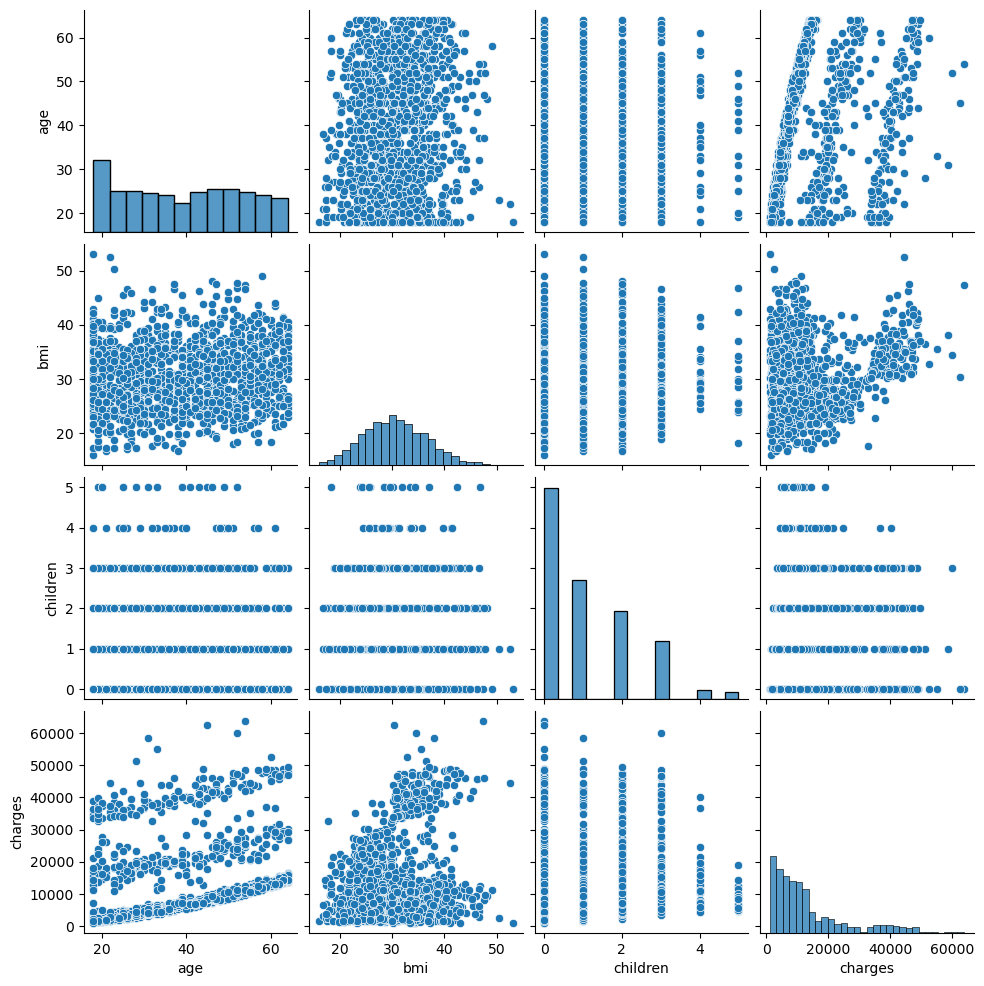

In [25]:
df_num= df.select_dtypes(np.number)#choosing numeric columns
sns.pairplot(df_num)

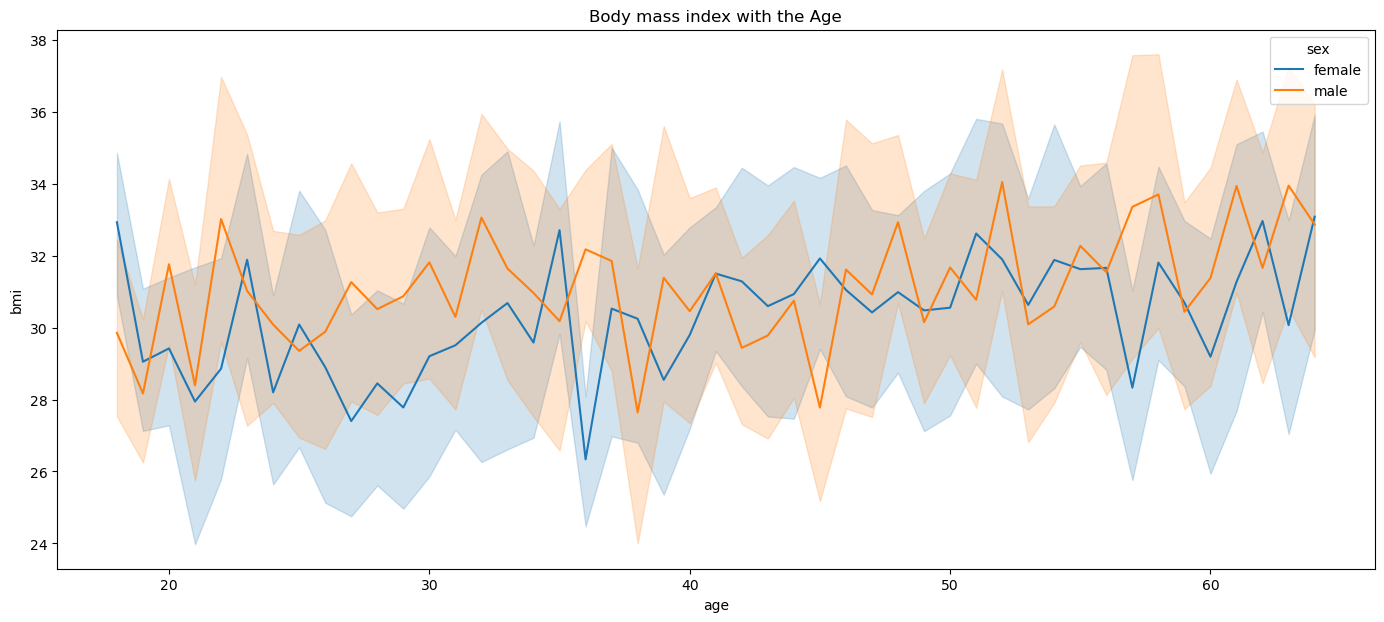

In [52]:
plt.figure(figsize=(17,7))
sns.lineplot(data=df,x="age",y="bmi",hue="sex")
plt.title("Body mass index with the Age")
plt.show()
# BMI of Male is greater as compared to female

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

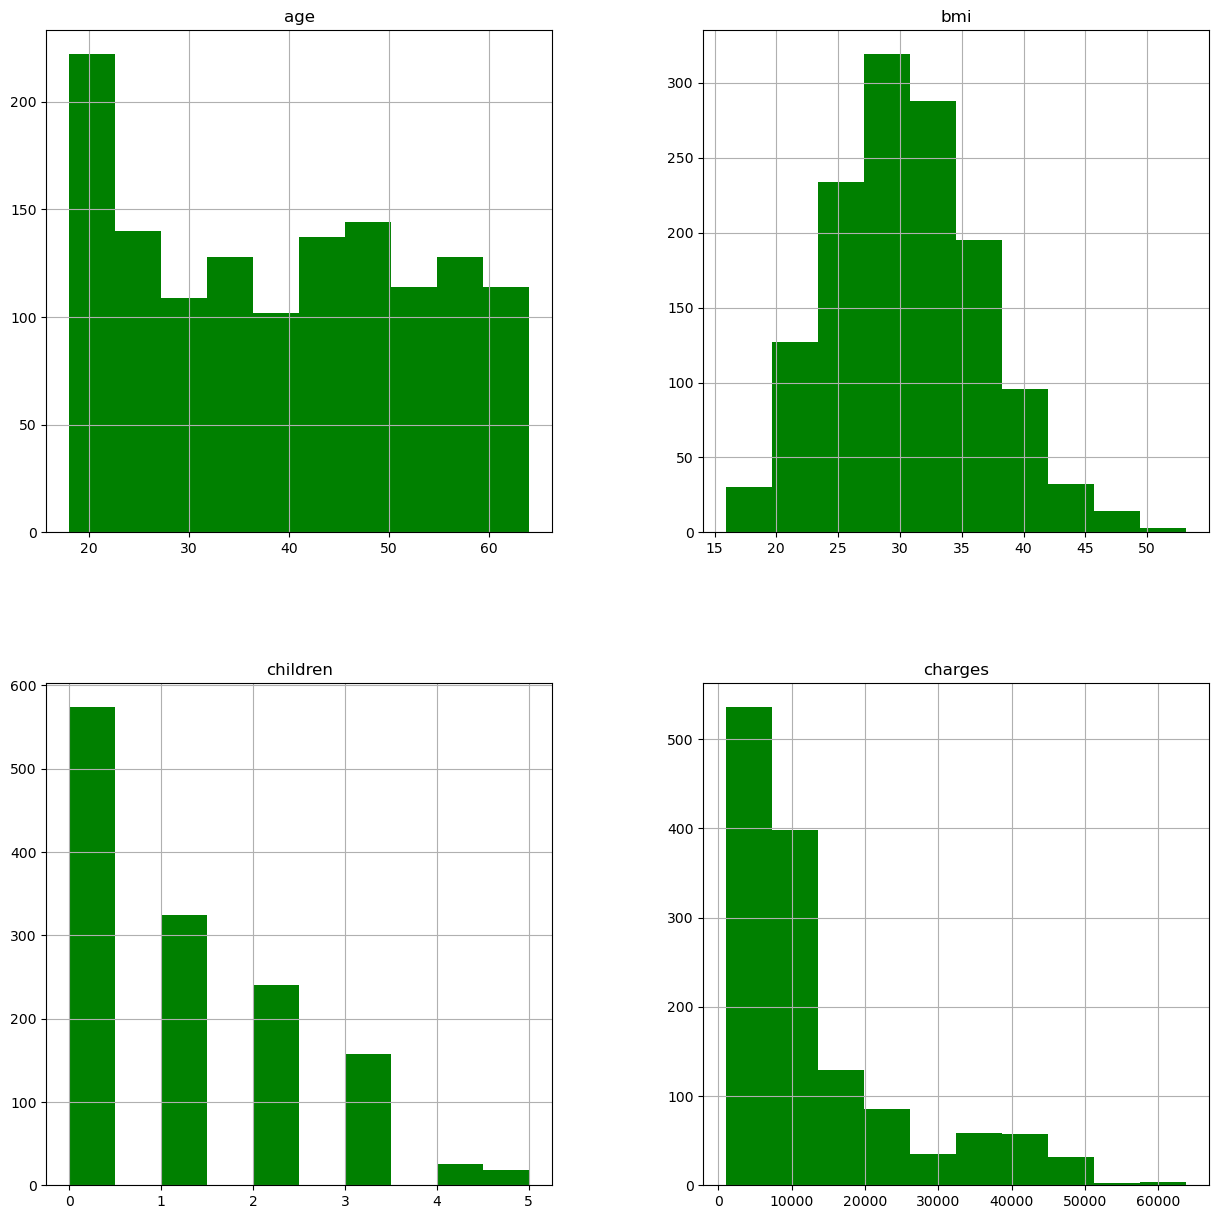

In [53]:
# Visualizing dataset using histogram
df[['age',  'bmi', 'children', 'charges']].hist(bins=10, figsize=(15,15),color='green')

In [54]:
df.groupby("region")["charges"].sum().round(2)

region
northeast    4343668.58
northwest    4035712.00
southeast    5363689.76
southwest    4012754.65
Name: charges, dtype: float64

In [55]:
# grouping the data
display(df.groupby(["sex","smoker","region"])["charges"].mean().round(2))

sex     smoker  region   
female  no      northeast     9640.43
                northwest     8787.00
                southeast     8440.21
                southwest     8234.09
        yes     northeast    28032.05
                northwest    29670.82
                southeast    33034.82
                southwest    31687.99
male    no      northeast     8664.04
                northwest     8320.69
                southeast     7609.00
                southwest     7778.91
        yes     northeast    30926.25
                northwest    30713.18
                southeast    36029.84
                southwest    32598.86
Name: charges, dtype: float64

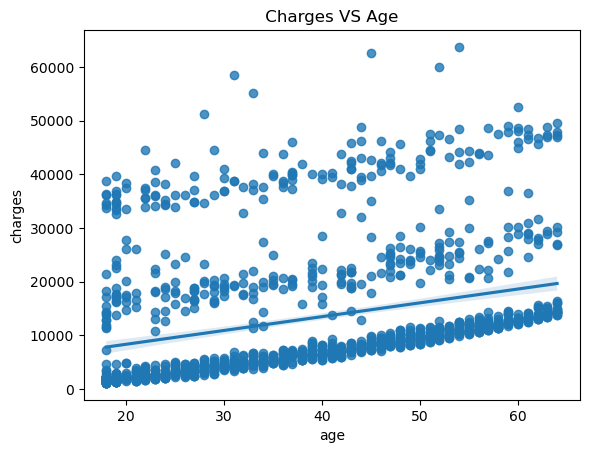

In [59]:
#Building the model after gaining insights about data
sns.regplot(x='age', y='charges', data=df)
plt.title(' Charges VS Age ')
plt.show()

In [26]:
df.groupby('smoker')['charges'].max()
#It is evident that smokers' medical expenses are excessive.

smoker
no     36910.60803
yes    63770.42801
Name: charges, dtype: float64

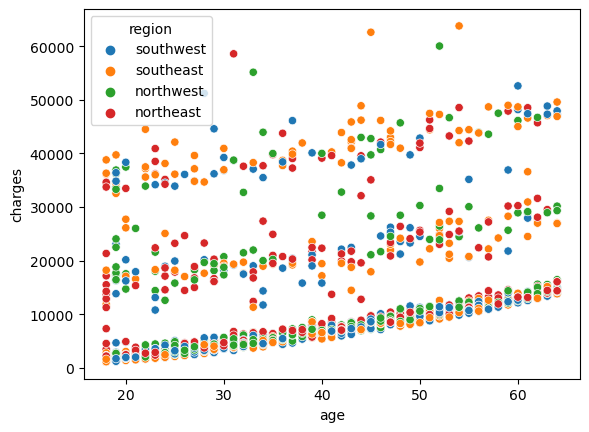

In [27]:
#Checking to see if the patients' age and location of residency have an effect on the cost of their medical care.
sns.scatterplot(df.age,df.charges,hue=df.region)
plt.show()

In [58]:
# Processing Non-Numeric Data
df_region=pd.get_dummies(df.region,drop_first=True)
#Making a dummy variable for each of the'region' categories.
df_region

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [30]:
#'smoker_label' is created, with a distinct label for each category in the variable'smoker'.
import scipy as stats
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
le=LabelEncoder()
ss=StandardScaler()
ms=MinMaxScaler()
# After importing the library and the sklearn

In [31]:
#Smoker is converted to 1 and non-smoker to 0.
df['smoker']=le.fit_transform(df['smoker'])
df['smoker'] 

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

In [33]:
#Establishing a variable that will hold the frequency of a person's gender.
df['sex']= df['sex'].replace(df['sex'].value_counts(normalize=True))
df['sex']

0       0.494768
1       0.505232
2       0.505232
3       0.505232
4       0.505232
          ...   
1333    0.505232
1334    0.494768
1335    0.494768
1336    0.494768
1337    0.494768
Name: sex, Length: 1338, dtype: float64

In [34]:
#Normalization of data
#BMI is transformed so that it has a mean of 0 and a variance of 1.
df.drop('region',axis=1,inplace=True) #Making sure that all of our columns are numeric before normalising our data.
newdf= pd.concat([df,df_region],axis=1)

#We concatenate the columns on which feature engineering was done because we now need to normalise the data.

In [35]:
#Applying Standard Scaler to the full dataset will help make the data more general and reduce the distance between individual data points.
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
scaled= SS.fit_transform(newdf)
scaled_df= pd.DataFrame(scaled,columns=newdf.columns)
scaled_df

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,0.298584,-0.566418,-0.611324,1.765481
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.953689,-0.566418,1.635795,-0.566418
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.728675,-0.566418,1.635795,-0.566418
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,0.719843,1.765481,-0.611324,-0.566418
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.776802,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.220551,1.765481,-0.611324,-0.566418
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-0.914002,-0.566418,-0.611324,-0.566418
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,-0.961596,-0.566418,1.635795,-0.566418
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,-0.930362,-0.566418,-0.611324,1.765481


Skewness- 1.515879658024039


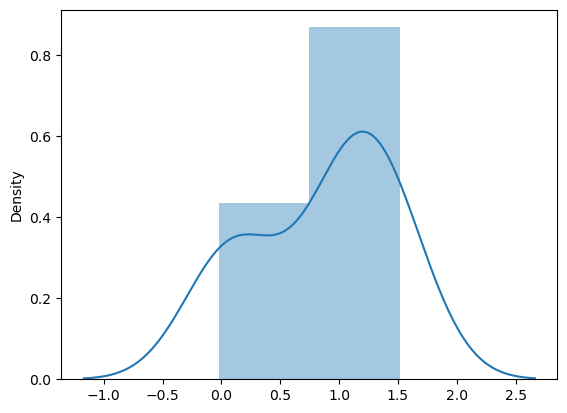

In [36]:
#transformation methods

#Verify the skewness of the'charges' variable. Use the proper strategy to lessen the skewness in the data if it is skewed.
print('Skewness-',scaled_df.charges.skew())
sns.distplot(scaled_df.skew())
plt.show()
# We have skewed values in our dataset, as we can see even after scaling the complete data set.

#We can use a variety of transformation techniques, including log transformation, sq rt, and cube root transformation, 
#to reduce this skewness.

Since the data in the graph above is significantly skewed, we will use data transformation techniques to make the data less skewed going forward.

In [37]:
scaled_df.skew()

age          0.055673
sex         -0.020951
bmi          0.284047
children     0.938380
smoker       1.464766
charges      1.515880
northwest    1.200409
southeast    1.025621
southwest    1.200409
dtype: float64

age          0.055673
sex         -0.020951
bmi          0.284047
children     0.938380
smoker       1.464766
charges      0.856241
northwest    1.200409
southeast    1.025621
southwest    1.200409
dtype: float64


<AxesSubplot:ylabel='Density'>

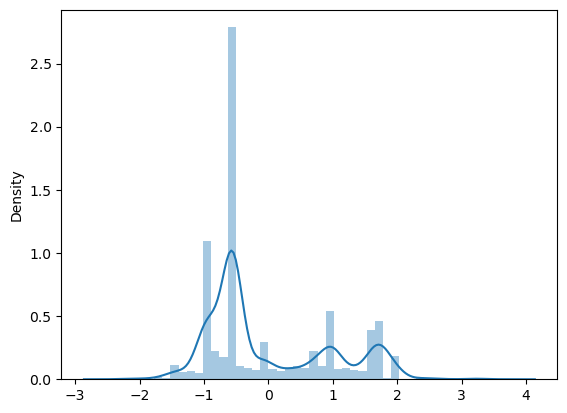

In [38]:
scaled_df['charges']= np.cbrt(scaled_df['charges'])
# observing the skewness
print(scaled_df.skew())
sns.distplot(scaled_df)
#We can observe that skewness has decreased following transformation.

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
sex=pd.get_dummies(df["sex"],drop_first=True)

In [62]:
smoker=pd.get_dummies(df["smoker"],drop_first=True)
region=pd.get_dummies(df["region"],drop_first=True)

In [63]:
# concatenating
df["Smoker"]=smoker

In [64]:
df["Sex"]=sex

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Smoker,Sex
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [66]:
df_new =df.drop(columns=["sex","region","smoker"])
df_new.head()

,age,bmi,children,charges,Smoker,Sex
0,19,27.900,0,16884.92400,1,0
1,18,33.770,1,1725.55230,0,1
2,28,33.000,3,4449.46200,0,1
3,33,22.705,0,21984.47061,0,1
4,32,28.880,0,3866.85520,0,1


In [67]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   Smoker    1338 non-null   uint8  
 5   Sex       1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(2)
memory usage: 44.6 KB


<AxesSubplot:>

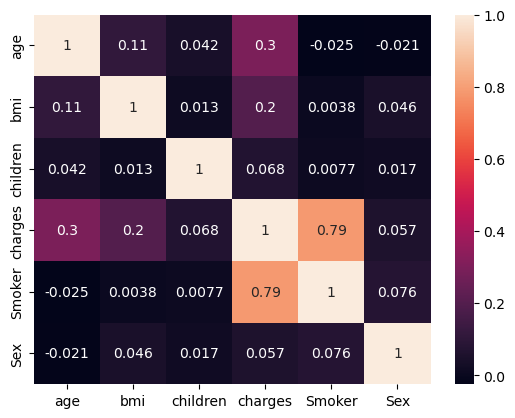

In [68]:
sns.heatmap(df_new.corr(),annot=True)

In [69]:
#Defining the corresponsing values of X and y respectively

X = df_new.drop(['charges'],axis=1)
y = df_new.charges

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)

In [70]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test : ", y_test.shape)

X Train :  (1003, 5)
X Test :  (335, 5)
Y Train :  (1003,)
Y Test :  (335,)


In [71]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred=model.predict(X_test)
y_pred

array([ 5777.84852442, 28378.56162864, 11507.26126214, 12199.14395411,
       24343.6315973 ,  6900.08017276, 14197.13710647, 30008.44250207,
       12170.51417607, 31605.96437715, 33471.9880474 , 12113.25226202,
       14028.12704259, 10957.96298219, 13122.90671155,  6682.71593547,
        6531.61379489, 38429.84641032, 35234.38882123,  7806.8977214 ,
       12596.7979659 ,  2187.34361764,  5857.68948865, 32661.92328014,
       14220.68903043, 25479.62067211, 14486.89841668,  2022.41209063,
        7122.42238453,  9246.09907765, 30281.81832792,  9080.57496063,
       31631.53214004, 36305.92349131, 23017.83209879,   501.59907324,
       14372.67284823, 10645.42981078,  9600.16366392, 16830.67128228,
        8043.45641784, 13042.55953286,  8519.65116182,  7554.92648087,
        1283.39645211,  9792.0171566 ,  3252.70991986, 27582.34079712,
        6213.51500491, 10076.23755683, 14409.22294383, 25386.11521282,
        8584.04415821, 11207.20939926,  9098.63791326,   726.21642292,
      

In [73]:
y_train

404      3260.19900
801     14313.84630
436      2254.79670
335     13822.80300
644     18806.14547
           ...     
1330    12629.16560
1016     2709.24395
165     10407.08585
7        7281.50560
219     25081.76784
Name: charges, Length: 1003, dtype: float64

In [74]:
mean_absolute_error(y_test,y_pred)

4285.429160989957

In [75]:
model.score(X,y)

0.7495761818227272